### Author: "730396223"

In [23]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


# Hypothesis: More comp majors are likely to have taken computer science A in highschool than non cs majors


### First I will read the rows of data and convert it into a column oriented style

In [24]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str,str]] = read_csv_rows("../../data/survey.csv")
columns: dict[str,list[str]] = columnar(data_rows)



### Next I am going to select the two columns that are most relevant to my research question and count how often they appear 

<BarContainer object of 4 artists>

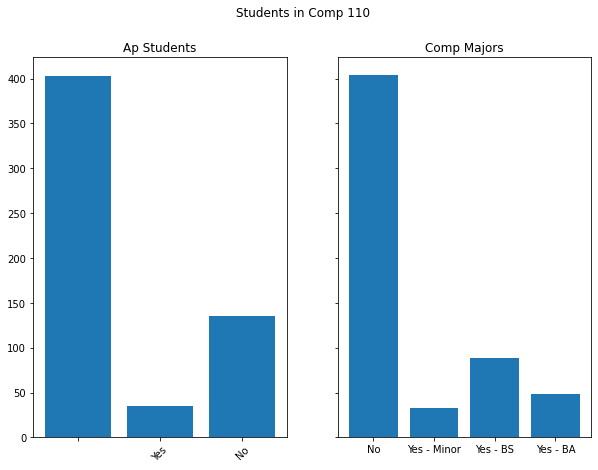

In [38]:
from data_utils import select, count, concat
from matplotlib import pyplot as plt


data_subset: dict = select(columns, ["AP_A","comp_major"])
ap_count: dict = count(columns["AP_A"])
cs_major_count: dict = count(columns["comp_major"])

fig, axes = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
fig.suptitle("Students in Comp 110")


axes[0].set_title("Ap Students")
axes[0].bar(ap_count.keys(), ap_count.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Comp Majors")
axes[1].bar(cs_major_count.keys(), cs_major_count.values())

#### 35 students have taken AP A and there are 169 comp majors in the class


## Now I am going to look at the first few columns of data to get a rough estimate of how many comp majors have taken AP_A

In [26]:
from data_utils import head
from tabulate import tabulate
data_cols_head: dict[str, list[str]] = head(columns, 20)
tabulate(data_cols_head, data_cols_head.keys(), "html")


row_number,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,AP_Principles,AP_A,other_comp,prior_time,languages,section,in_person_classes,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,23,Returning UNC Student,No,Advertising and Public Relations,No,"MATH 129P, MATH 130",None to less than one month!,,,,,,In-Person,,3 to 5 hours,3 to 5 hours,5,2,2,4,2,2,7,6,6,5,5,,3,5,5,4,5,6,7
1,24,Returning UNC Student,No,Anthropology,No,"MATH 129P, MATH 231",None to less than one month!,,,,,,In-Person,,5 to 10 hours,5 to 10 hours,4,5,4,7,6,0,6,5,7,5,,,6,5,3,7,7,7,7
2,23,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, MATH 233, MATH 381",None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,5 to 10 hours,2,1,1,7,6,0,7,7,7,7,,,,5,5,6,7,7,7
3,24,Returning UNC Student,No,Biology,No,"MATH 130, MATH 231",None to less than one month!,,,,,,,Yes,5 to 10 hours,5 to 10 hours,2,3,1,6,4,4,7,7,7,7,7,7,7,6,6,4,5,4,7
4,22,Returning UNC Student,No,Biology,No,"MATH 129P, MATH 130, MATH 231, MATH 232, MATH 233",None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,3 to 5 hours,3,1,1,5,4,1,6,6,7,5,,,,5,4,4,6,6,7
5,24,Incoming Transfer Student,No,Biology,Maybe,"MATH 129P, MATH 231, STOR 151",Over 2 years,Yes,Yes,High school course (IB or other),None to less than one month!,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS, net beans, MIT app inventor",Remote,Yes,0 to 2 hours,5 to 10 hours,6,4,3,7,6,1,5,5,4,5,,,7,5,5,6,5,4,4
6,22,Returning UNC Student,No,Biology,No,STOR 155,None to less than one month!,,,,,,Remote,Yes,5 to 10 hours,3 to 5 hours,2,2,2,4,4,0,6,6,4,5,3,3,5,6,6,4,4,6,6
7,24,Returning UNC Student,No,Biology,No,MATH 130,None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,5 to 10 hours,7,2,1,7,5,1,6,5,6,4,4,4,4,5,5,4,5,5,4
8,24,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, STOR 155",None to less than one month!,,,,,,Remote,Yes,5 to 10 hours,3 to 5 hours,6,5,3,7,3,1,6,7,7,7,,,5,4,5,5,7,6,6
9,22,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, MATH 233, PSYC 210, STOR 155",None to less than one month!,,,,,,Remote,Yes,5 to 10 hours,5 to 10 hours,2,3,2,6,4,2,7,7,7,6,4,7,7,7,7,3,5,6,5


### The first 20 students on the list do not given us enough evidence to make any sort of conclusion or assumption

### Now I am going to implement a function to find how many cs majors completed cs A

In [33]:
from data_utils import col_count
comp_ap: dict[str, int] = col_count( columns["comp_major"],columns["AP_A"], "Yes")
print(comp_ap)

{'': 1, 'Yes': 1, 'No': 36}


# Conclusion

## In the end, we can see from the data using the function I created to determine that my hypothesis was **False** and more cs majors are not more likely to have taken AP CS A prior to this class. It seems equally likely for any student in this class to have taken AP A